In [1]:
import os
import textract
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/chloe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Préparation du corpus

### Dézipper nos fichiers dans un répertoire dédié

In [2]:
!mkdir data
!unzip camille_962_congo.zip 
!mv *.txt data
!unzip camille_50_congo.zip
!mv *.txt data

mkdir: impossible de créer le répertoire «data»: Le fichier existe
Archive:  camille_962_congo.zip
 extracting: KB_JB837_1905-11-06_01-00006.txt  
 extracting: KB_JB572_1908-05-13_01-00001.txt  
 extracting: KB_JB685_1905-11-05_01-0005.txt  
 extracting: KB_JB838_1905-11-06_01-00002.txt  
 extracting: KB_JB572_1908-05-14_01-00003.txt  
 extracting: KB_JB555_1905-11-06_01-00009.txt  
 extracting: KB_JB837_1905-11-08_01-00001.txt  
 extracting: KB_JB555_1905-11-06_01-00010.txt  
 extracting: KB_JB572_1909-03-30_01-00001.txt  
 extracting: KB_JB838_1905-11-07_01-00002.txt  
 extracting: KB_JB837_1905-11-17_01-00001.txt  
 extracting: KB_JB572_1908-05-23_01-00003.txt  
 extracting: KB_JB555_1906-06-11_01-00002.txt  
 extracting: KB_JB555_1909-03-01_01-00002.txt  
 extracting: KB_JB837_1905-10-28_01-00001.txt  
 extracting: KB_JB572_1905-11-22_01-00001.txt  
 extracting: KB_JB572_1908-05-13_01-00002.txt  
 extracting: KB_JB572_1901-07-17_01-00003.txt  
 extracting: KB_JB838_1901-07-17_01-00

#### Vérification du nombre de fichiers (il en faut 1012)

In [3]:
#vérifier le nombre de fichier
path = "data/"
files = sorted(os.listdir(path))
len(files)

1015

#### Création d'un fichier unique reprenant nos 1012 fichiers

In [23]:
!rm data/_README.txt
!cat data/*.txt > data/all.txt

# Première exploration : la distribution de nos données par journaux et par année

### Distribution du corpus par journaux :

In [10]:
chaine = 'KB_JB838_1887-12-22_01-00001'
type(chaine)
# la méthode split
chaine_split = chaine.split('_')
chaine_split
# Accéder à la date
date = chaine_split[2]
# Accéder à l'année
date_split = date.split('-')
year = date_split[0]
year[:3] + '0s'
all_years = [str(year) for year in range(1885, 1914)]

In [9]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_years = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith(".txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
        count_years[year] += 1
    else:
        print(f"Anomalous file: {f}")

print(f"Il y a :\n {count_newspapers['JB838']} exemplaires du journal Le Soir,\n {count_newspapers['JB427']} exemplaires de La Libre Belgique,\n {count_newspapers['JB421']} exemplaire de L'Avenir du Luxembourg,\n {count_newspapers['JB555']} exemplaires de L'Indépendance belge,\n {count_newspapers['JB555A']} exemplaires de L'Indépendance belge (édité en Angleterre),\n {count_newspapers['JB567']} exemplaires du Journal de Bruxelles,\n {count_newspapers['JB572']} exemplaires du Journal de Charleroi,\n {count_newspapers['JB638']} exemplaires de La Meuse,\n {count_newspapers['JB685']} exemplaires du Petit Bleu,\n {count_newspapers['JB729']} exemplaire du journal Le Vingtième Siècle,\n {count_newspapers['JB773']} exemplaires de Vers l'Avenir,\n {count_newspapers['JB837']} exemplaire du journal Le Peuple,\n {count_newspapers['JB1051']} exemplaires du Drapeau Rouge")

IndexError: list index out of range

#### Vérifier si toutes les années sont couvertes

In [11]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}") #Aucune année ne manquen !

Années manquantes: 


#### Voir la répartition des articles par années

In [12]:
for year, count in count_years.items():
    print(f"Year {year}: {count} files")


Year 1900: 40 files
Year 1905: 120 files
Year 1906: 74 files
Year 1907: 50 files
Year 1908: 92 files
Year 1910: 30 files
Year 1911: 43 files
Year 1912: 31 files
Year 1913: 31 files
Year 1914: 19 files
Year 1885: 5 files
Year 1888: 4 files
Year 1889: 20 files
Year 1890: 16 files
Year 1892: 34 files
Year 1893: 24 files
Year 1894: 29 files
Year 1895: 29 files
Year 1897: 30 files
Year 1899: 16 files
Year 1901: 38 files
Year 1902: 15 files
Year 1903: 66 files
Year 1904: 36 files
Year 1909: 60 files
Year 1887: 2 files
Year 1891: 12 files
Year 1896: 26 files
Year 1898: 19 files
Year 1886: 1 files


#### Visualisation du nombre d'article par années

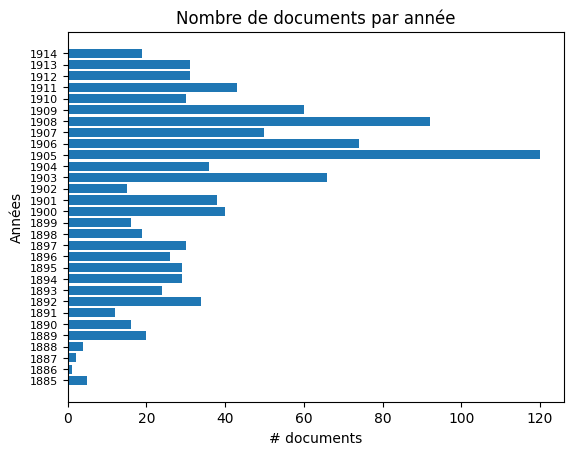

In [13]:
# S'assurer que count_years est trié par année
sorted_years = sorted(count_years.items())

# Séparer les années et leurs comptabilisation
years, counts = zip(*sorted_years)

# Créer un index pour l'axe des y
index = np.arange(len(years))

# Tracez le graphique à barres horizontales
plt.barh(index, counts)

plt.ylabel('Années')
plt.xlabel('# documents')
plt.yticks(index, years, fontsize=8)
plt.title('Nombre de documents par année')

# Affichez le graphique
plt.show()



## Fréquence des mots dans le corpus

#### Création d'une liste de stop-words

In [14]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "rue", "très", "Bruxelles", "leur", "heures",
       "ans", "francs", "jours", "quelque", "toute", "jour", "bruxelles", "quelques", "grand",
       "peu", "Leurs", "mois", "temps", "ceux", "leurs", "leur", "Leurs", "lieu", "général", "grande"]
sw = set(sw)
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

219 stopwords:
 ['Bruxelles', 'Leurs', 'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'ans', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'bruxelles', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'ceux', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'francs', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'grand', 'grande', 'général', 'het', 'heures', 'il', 'ils', 'j', 'je', 'jour', 'jours', 'jusqu', '

### Tokenization

In [15]:
# Récupération du contenu du fichier
path = "data/all.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [16]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

8924980 words found


In [17]:
words[:50]

['omatose',
 'Reconstituant',
 'par',
 'excellence',
 '.',
 'Recommandé',
 'dans',
 'Anémie',
 ',',
 'Chlorose',
 ',',
 'Habilité',
 ',',
 'AmaisrlssemeD',
 '-,',
 'Inappétence',
 ',',
 'enfants',
 'adultes',
 ',',
 'vieillards',
 'Dem',
 '.',
 'nharm',
 '.',
 'Dépôt',
 'gén',
 'p',
 "'",
 'la',
 'Belgique',
 ':',
 'Fr',
 '.',
 'BAYER',
 'et',
 'O',
 ',',
 '79',
 ',',
 'rue',
 'de',
 'Brabant',
 ',',
 'Bruxelles',
 '-',
 'Nord',
 '.',
 '3S0',
 'Choses']

### Calcul de la taille du vocabulaire

In [18]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

3061704 words kept (370415 different word forms)


### Récupération des mots les plus fréquents et visualisation

In [19]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('congo', 8470),
 ('etat', 6348),
 ('gouvernement', 4696),
 ('prix', 4374),
 ('belgique', 4142),
 ('pays', 4067),
 ('travail', 3925),
 ('société', 3580),
 ('paris', 3390),
 ('roi', 3348)]

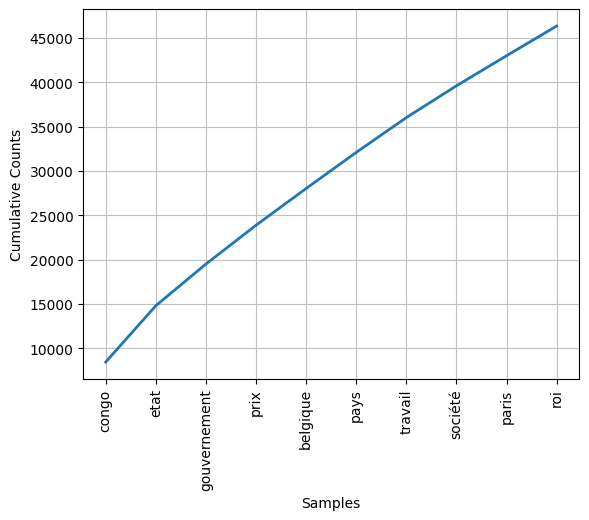

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [20]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

### Détection des hapax

In [21]:
fdist.hapaxes()[:30]

['omatose',
 'amaisrlssemed',
 'inappétence',
 'lâcheront',
 'procéderez',
 'surfait',
 'trouveree',
 'prejets',
 'eeels',
 'interpellât',
 'attrocités',
 'refesé',
 'campfraif',
 'chanterait',
 'embaumées',
 'suivrô',
 'ublié',
 'cettç',
 'résraeux',
 'divsws',
 'îpu',
 'tirleraomtoise',
 'mttocycles',
 'perfecta',
 'velixir',
 'antigoutteux',
 'antirhumatismal',
 'tédesco',
 'laduisant',
 'oriemter']

In [22]:
#Recherche des mots les plus longs du corpus
n = 30
sorted(voc, key=len, reverse=True)[:n]

['sasatasaasasaasamaastaesbbsttaamsasasabeasawsxssjsataatsasasatsaratam',
 'aaaaaaaasaasamaaweaaaaaaaaaaasmammaaabaeaeabaaaaaaaaaam',
 'minationcommaadraiuistrricenrdesiastallationti',
 'çstbentaireallouéependantfepériodeannuelle',
 'quelaconférenaedeberlinaitmisuntermeàcette',
 'édiilcespublicsetlesmaisonsétaientpavoisés',
 'cedoublccourspermetdedéterminerlecourb',
 'àvegsesécjiosguerriersjsesnymphesquine',
 'schouttetenayantditensuitequerheuredes',
 'etanxinesquinesvengeancosdessatrapes',
 'vvvivvvvvvvvvvvvvvvvvvvvwvvvvvvwvvvv',
 'mmmsesbsbsbëssmbëigssmissêmmtsssmssm',
 'ftctiontasituatiznetarderapasàsedes',
 'esquellesplusieursmissioimairesoiht',
 'edoublerourspermetdedéternjnerlmour',
 'ammedesfestivilésfigurentrillumina',
 'niaiiitciianlquelquespersoiiucsqui',
 'émoiiondelajeunefemmeétaitprofonde',
 'sshbhhëbhhbbhsbshhshhsssshihsmiùgj',
 'wavrorquolquoasociallstoswavricng',
 'gasetlegênéraledetallemagnedunord',
 'fastuousesquisosoientjamaisdonnég',
 'datelesouvriersdesdiversesloss